In [1]:
# Evaluaciones de peliculas
#             Pelicula 1  |  Pelicula 2
# Cliente 1 |      5      |     3
# Cliente 2 |      2      |     1
# Cliente 3 |      X      |     5

In [2]:
import numpy as np
import pandas
from sklearn.manifold import MDS 
import matplotlib.pyplot as plt

In [3]:
nClientes = 1682
nPeliculas = 943
E = np.zeros((nClientes,nPeliculas) )

file = open('peliculas/Peliculas_Clientes.txt','r')
for line in file:
    id_pelicula, id_cliente, evaluacion, _ = line.split('\t')
    E[int(id_cliente)-1,int(id_pelicula)-1] = evaluacion
print(E)
df = pandas.DataFrame(E,index=np.arange(1,nClientes+1),columns=np.arange(1,nPeliculas+1))
df.to_csv('evaluaciones_peliculas.csv')

[[5. 4. 0. ... 5. 0. 0.]
 [3. 0. 0. ... 0. 0. 5.]
 [4. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [4]:
peliculas = []
file = open('peliculas/Peliculas_descripcion.txt','r')
for line in file:
    arr = line.split('|')
    id_pelicula, titulo = arr[0], arr[1]
    peliculas.append( titulo )
print(len(peliculas),peliculas)

1682 ['Toy Story (1995)', 'GoldenEye (1995)', 'Four Rooms (1995)', 'Get Shorty (1995)', 'Copycat (1995)', 'Shanghai Triad (Yao a yao yao dao waipo qiao) (1995)', 'Twelve Monkeys (1995)', 'Babe (1995)', 'Dead Man Walking (1995)', 'Richard III (1995)', 'Seven (Se7en) (1995)', 'Usual Suspects, The (1995)', 'Mighty Aphrodite (1995)', 'Postino, Il (1994)', "Mr. Holland's Opus (1995)", 'French Twist (Gazon maudit) (1995)', 'From Dusk Till Dawn (1996)', 'White Balloon, The (1995)', "Antonia's Line (1995)", 'Angels and Insects (1995)', 'Muppet Treasure Island (1996)', 'Braveheart (1995)', 'Taxi Driver (1976)', 'Rumble in the Bronx (1995)', 'Birdcage, The (1996)', 'Brothers McMullen, The (1995)', 'Bad Boys (1995)', 'Apollo 13 (1995)', 'Batman Forever (1995)', 'Belle de jour (1967)', 'Crimson Tide (1995)', 'Crumb (1994)', 'Desperado (1995)', 'Doom Generation, The (1995)', 'Free Willy 2: The Adventure Home (1995)', 'Mad Love (1995)', 'Nadja (1994)', 'Net, The (1995)', 'Strange Days (1995)', 'To W

### Filtrar: conservar sólo las N peliculas con mayor número de evaluaciones

In [5]:
N = 100

print('Evaluaciones:',E.shape)
print(E)
# Calcular el número de evaluaciones por película
n_evaluaciones_pelicula = np.zeros((nPeliculas))
for p in range(nPeliculas):
    n_evaluaciones_pelicula[p] = np.sum(  E[:,p]!=0  )
    
# Ordenar de la que tiene mayor número de evaluaciones a la menor
idx = np.argsort(n_evaluaciones_pelicula)
idx = idx[::-1]
peliculas = np.array(peliculas)[idx]
n_evaluaciones_pelicula = n_evaluaciones_pelicula[idx]

idx = idx[:N]
peliculas = peliculas[:N]
n_evaluaciones_pelicula = n_evaluaciones_pelicula[:N]

for i in range(len(idx)):
    print( peliculas[i],n_evaluaciones_pelicula[i])


Evaluaciones: (1682, 943)
[[5. 4. 0. ... 5. 0. 0.]
 [3. 0. 0. ... 0. 0. 5.]
 [4. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Mission: Impossible (1996) 737.0
Stand by Me (1986) 685.0
Mighty Aphrodite (1995) 636.0
Star Trek V: The Final Frontier (1989) 540.0
Leaving Las Vegas (1995) 518.0
Old Yeller (1957) 493.0
My Own Private Idaho (1991) 490.0
Ulee's Gold (1997) 484.0
Jaws (1975) 480.0
Mrs. Doubtfire (1993) 448.0
Return of the Jedi (1983) 435.0
Once Upon a Time... When We Were Colored (1995) 434.0
Day the Earth Stood Still, The (1951) 414.0
To Gillian on Her 37th Birthday (1996) 405.0
Twelve Monkeys (1995) 403.0
Home Alone (1990) 400.0
I Know What You Did Last Summer (1997) 399.0
FairyTale: A True Story (1997) 397.0
Donnie Brasco (1997) 388.0
True Romance (1993) 388.0
Star Trek: First Contact (1996) 387.0
Evil Dead II (1987) 386.0
Three Colors: Red (1994) 382.0
Butch Cassidy and the Sundance Kid (1969) 379.0
Miracle on 34th Stre

In [6]:
E = E[:,idx]
df = pandas.DataFrame(E,index=np.arange(1,nClientes+1),columns=peliculas)
df.to_csv('evaluaciones_peliculas.csv')

## Representación 1: con matriz de distancias

In [7]:
D = np.zeros((N,N))
for i in range(N):
    for j in range(i+1,N):
        peli = E[:,i]
        pelj = E[:,j]
        idx = np.logical_and( peli!=0, pelj!=0 )
        peli = peli[idx]
        pelj = pelj[idx]
        D[i,j] = D[j,i] = np.mean(np.abs( peli-pelj ))
print(D)

[[0.         1.62996942 1.71044776 ... 1.60588235 1.50694444 1.86231884]
 [1.62996942 0.         1.25449102 ... 1.03067485 1.12380952 1.21290323]
 [1.71044776 1.25449102 0.         ... 1.17682927 1.13888889 1.21527778]
 ...
 [1.60588235 1.03067485 1.17682927 ... 0.         0.921875   1.02884615]
 [1.50694444 1.12380952 1.13888889 ... 0.921875   0.         1.18333333]
 [1.86231884 1.21290323 1.21527778 ... 1.02884615 1.18333333 0.        ]]


In [8]:

model = MDS(dissimilarity='precomputed')
X = model.fit_transform(D)
print('X',X.shape)

X (100, 2)


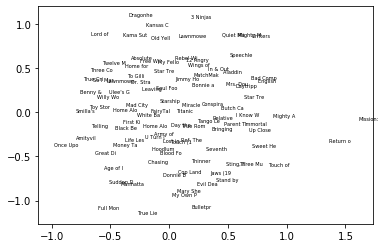

In [13]:

plt.figure()
plt.plot(X[:,0],X[:,1],'.',color='white')
for i in range(N):
    plt.text(X[i,0],X[i,1],peliculas[i][:8],fontsize=5)
plt.savefig('peliculas.png',dpi=300)

## Representación 2: con los datos de las evaluaciones

E (1682, 100)
X (100, 1682)
X (100, 2)


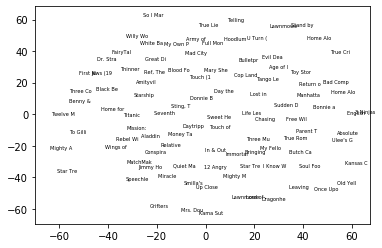

In [16]:
print('E',E.shape)
X = E.transpose()
print('X',X.shape)

model = MDS(dissimilarity='euclidean')
X = model.fit_transform(X)
print('X',X.shape)

plt.figure()
plt.plot(X[:,0],X[:,1],'.',color='white')
for i in range(N):
    plt.text(X[i,0],X[i,1],peliculas[i][:8],fontsize=5)
plt.savefig('peliculas.png',dpi=300)